In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
#edit in csv path
diabetes = pd.read_csv('')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [15]:
diabetes.shape

(768, 9)

In [16]:
diabetes.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [49]:
#data cleaning.
#These catagories should not have 0.
glucoseZero = (diabetes['Glucose'] == 0).any()
bpZero = (diabetes['BloodPressure'] == 0).any()
skinZero = (diabetes['SkinThickness'] == 0).any()
insulinZero = (diabetes['Insulin'] == 0).any()
bmiZero = (diabetes['BMI'] == 0).any()

print(glucoseZero, bpZero, skinZero, insulinZero, bmiZero)
#but they do

#need to replace 0s with medians.

medGlucose = diabetes[diabetes['Glucose'] != 0]['Glucose'].median()
medBP = diabetes[diabetes['BloodPressure'] != 0]['BloodPressure'].median()
medSkin = diabetes[diabetes['SkinThickness'] != 0]['SkinThickness'].median()
medInsulin = diabetes[diabetes['Insulin'] != 0]['Insulin'].median()
medBMI = diabetes[diabetes['BMI'] != 0]['BMI'].median()
#calculated medians excluding the 0s

print(medGlucose, medBP, medSkin, medInsulin, medBMI)

False False False False False
117.0 72.0 29.0 125.0 32.3


In [48]:
#replace 0s with median values

diabetes['Glucose'] = diabetes['Glucose'].replace(0,medGlucose)
diabetes['BloodPressure'] = diabetes['BloodPressure'].replace(0,medBP)
diabetes['SkinThickness'] = diabetes['SkinThickness'].replace(0,medSkin)
diabetes['Insulin'] = diabetes['Insulin'].replace(0,medInsulin)
diabetes['BMI'] = diabetes['BMI'].replace(0,medBMI)


In [20]:
from sklearn.ensemble import RandomForestClassifier

In [21]:
#higher estimators value takes longer
rf = RandomForestClassifier(n_estimators=50, min_samples_split = 10, random_state = 1)


In [22]:
total_rows = len(diabetes)
#training set is 80% of data
train = diabetes[diabetes.index < .8 * total_rows]
#test is rest of data
test = diabetes[diabetes.index > .8 * total_rows]

In [23]:
#predictor columns
predictors = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']

In [24]:
#fit the model
rf.fit(train[predictors],train["Outcome"])

RandomForestClassifier(min_samples_split=10, n_estimators=50, random_state=1)

In [25]:
preds = rf.predict(test[predictors])

In [26]:
from sklearn.metrics import accuracy_score

In [27]:
accuracy = accuracy_score(test["Outcome"],preds)

In [28]:
accuracy #.7450980392156863
#how close scores are to target

0.7450980392156863

In [29]:
combined = pd.DataFrame(dict(actual=test["Outcome"], prediction=preds))

In [34]:
pd.crosstab(index=combined["actual"],columns=combined["prediction"])

prediction,0,1
actual,,
0,86,13
1,26,28


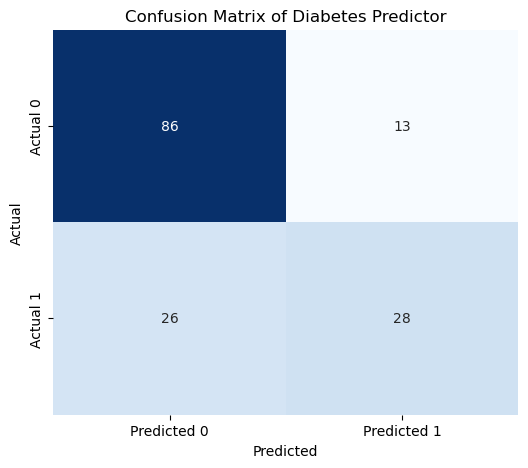

In [41]:
from sklearn.metrics import precision_score
precision_score(test["Outcome"],preds) #6829268292682927
#how close scores are to each other
from sklearn.metrics import confusion_matrix

#Create confusion matrix
cm = confusion_matrix(test["Outcome"], preds)

#Plot confusion matrix
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of Diabetes Predictor')
plt.show()

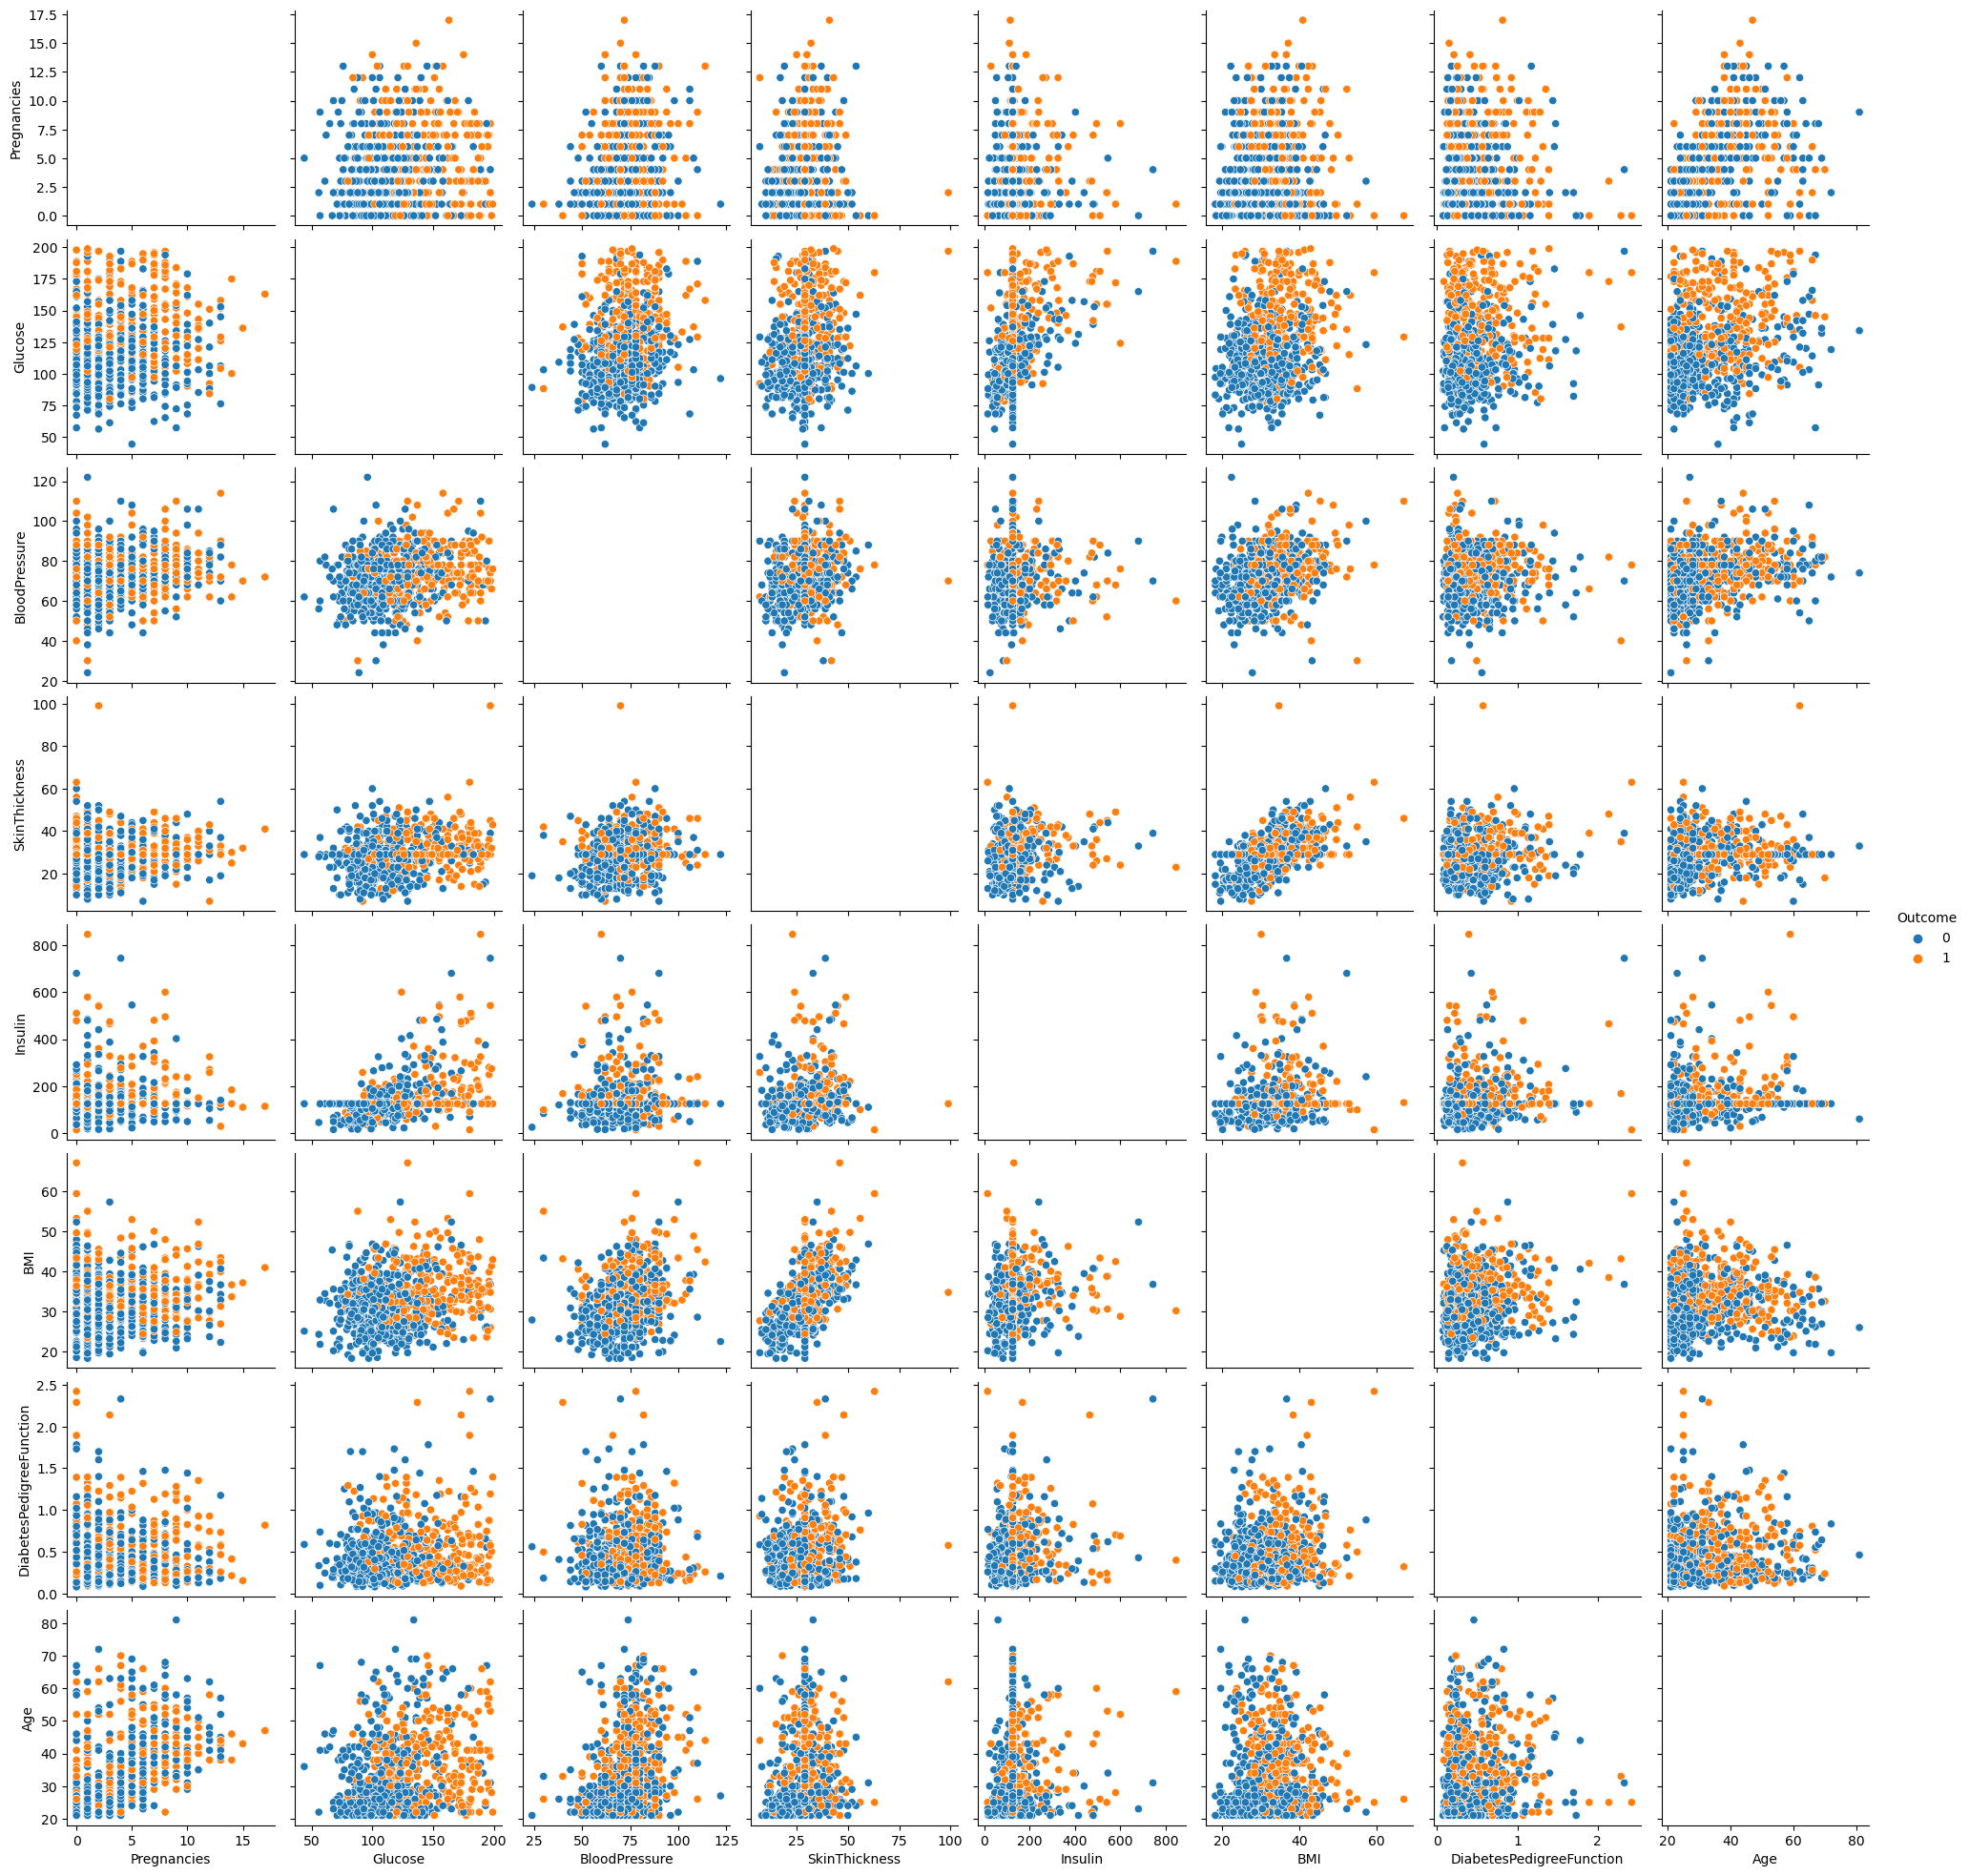

In [40]:
#Analysis on Relationships

#Pairplot
sns.pairplot(diabetes, hue="Outcome", diag_kind = 'scatter')

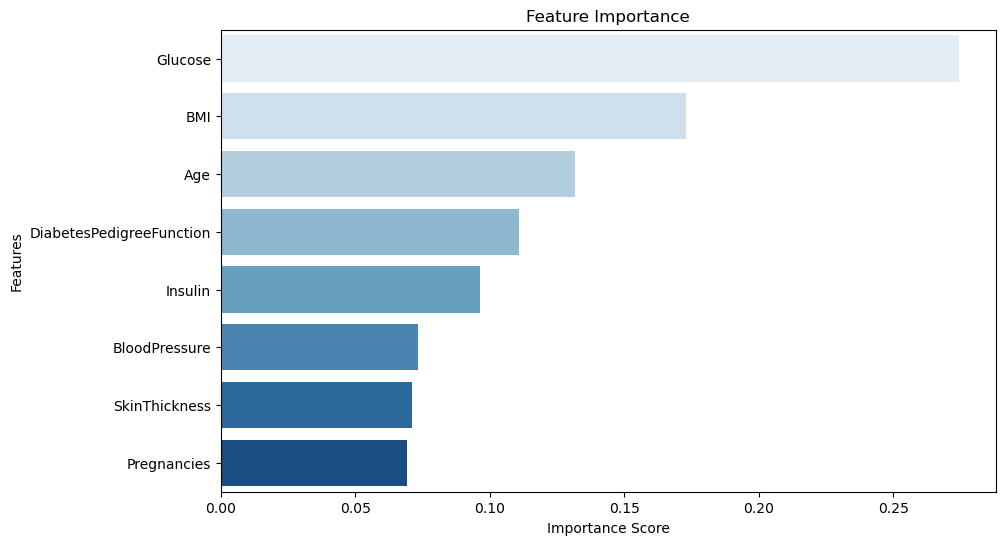

In [47]:
#feature importance
feature_importances = rf.feature_importances_

#convert to dataframe for readability
importance_df = pd.DataFrame({'Feature': predictors, 'Importance': feature_importances}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x="Importance", y="Feature", data=importance_df, palette="Blues")
plt.title("Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Features")

plt.show()

In [61]:

#User input function that takes in user inputs and predicts outcome based on that
def userInput():  
    #user inputs
    uPregnancies = input('Enter Number of Pregnancies:')
    uGlucose = input('Enter Glucose Level:')
    uBloodPressure = input('Enter Blood Pressure Level:')
    uSkinThickness = input('Enter Skin Thickness:')
    uInsulin = input('Enter Insulin Level:')
    uBMI = input('Enter BMI:')
    udpf = input('Enter Diabetes Pedigree Function Level:')
    uage = input('Enter Age:')
    
    #sample data of dataframe using type dictionary
    user_sample = pd.DataFrame({
    'Pregnancies':[uPregnancies],
    'Glucose':[uGlucose],
    'BloodPressure':[uBloodPressure],
    'SkinThickness':[uSkinThickness],
    'Insulin':[uInsulin],
    'BMI':[uBMI],
    'DiabetesPedigreeFunction':[udpf],
    'Age':[uage]})
    
    #prediction
    prediction = rf.predict(user_sample)
    
    if (prediction[0]==1):
        predictionresult = "Positive"
    else:
        predictionresult = "Negative"
        
    print("Test:", prediction)    
    print("The prediction based on your data is: ", predictionresult)


userInput()


Enter Number of Pregnancies:4
Enter Glucose Level:200
Enter Blood Pressure Level:120
Enter Skin Thickness:120
Enter Insulin Level:120
Enter BMI:30
Enter Diabetes Pedigree Function Level:.5
Enter Age:30
Test: [1]
The prediction based on your data is:  Positive


In [ ]:
#Room for improvement:
#Treat missing values using strategies like iterative imputer.
#Use other models like linear regression, neural network
#Use categorical columns in addition to numerical data
#Remove outliers for each column
